### Draw Mohr diagrams

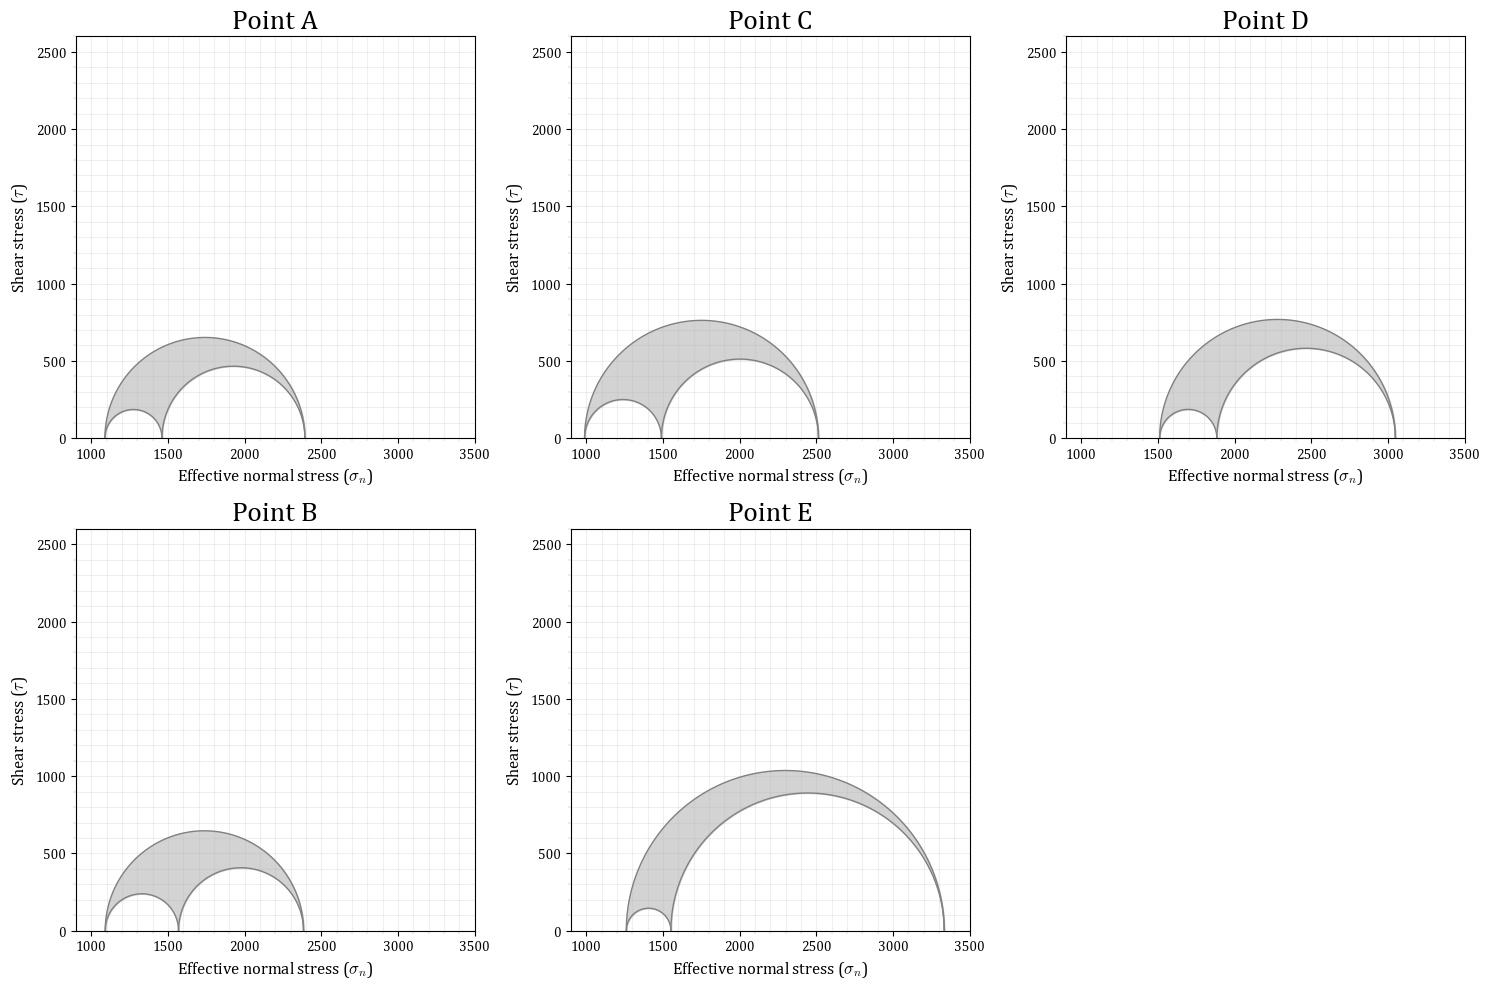

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

def shear( sig_n, s1, s2 ) :
    """ 
    Creates a shear series for given values of principal stresses and sig_n
    """
    center = (s1 + s2)/2
    radius = (s1 - s2)/2
    dx = sig_n - center
    tau_sq = radius * radius - dx * dx
    tau_sq[ tau_sq < 0 ] = None
    return np.sqrt( tau_sq )

def mohr(s1, s2, s3, ax, title="") :
    """ 
    Plot Mohr diagram 
    """
    # Setup data
    npts = 1000
 
    [s1,s2,s3] = sorted([s1,s2,s3], reverse=True)
    step = (s1-s3)/npts
    sig_n = np.sort( np.append( np.arange(s3,s1,step), [s1, s2, s3]) )
    
    s12_tau = shear( sig_n, s1, s2 )
    s13_tau = shear( sig_n, s1, s3 )
    s23_tau = shear( sig_n, s2, s3 )

    # Do the plotting stuff
    ax.plot(sig_n, s12_tau, c='gray')
    ax.plot(sig_n, s23_tau, c='gray')
    ax.plot(sig_n, s13_tau, c='gray')

    ax.fill_between(sig_n, s12_tau, s13_tau, color='lightgray')
    ax.fill_between(sig_n, s23_tau, s13_tau, color='lightgray' )

    min, max = 900, 3500
    ax.set_xlim(min, max)
    ax.set_ylim(0, max-min)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel("Shear stress ($\\tau$)")
    ax.set_xlabel("Effective normal stress ($\sigma_n$)")

    return ax 

# Do the plotting
fig,[[ax11,ax12,ax13], [ax21,ax22,ax23]] = plt.subplots(2,3)
fig.set_size_inches(15,10)
ax23.remove()

mohr(1461,2393,1089, ax11, "Point A")
mohr(1490,2514,989,  ax12, "Point C")
mohr(1511,3048,1884, ax13, "Point D")
mohr(1569,2384,1091, ax21, "Point B")
mohr(1552,3334,1261, ax22, "Point E")

# Format and save.
fig.tight_layout()
fig.savefig('HW1_MOHR.svg')

### Draw p-q points

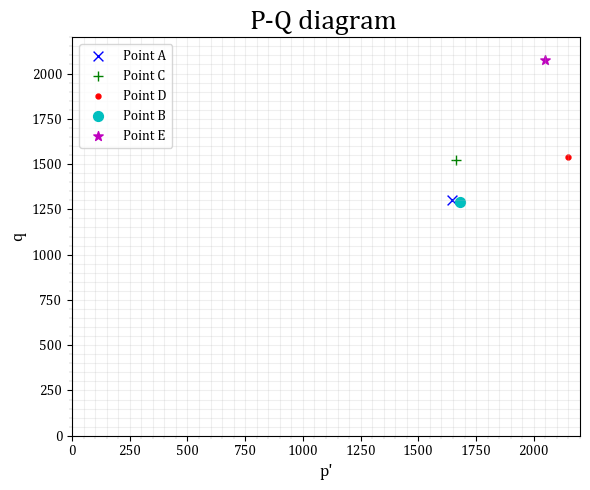

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')
import itertools
mrk = itertools.cycle(('x', '+', '.', 'o', '*')) 

def pq(s1, s2, s3, ax, title="") :
    """ 
    Plot PQ diagram using Pandas DF
    """
    [s1,s2,s3] = sorted([s1,s2,s3], reverse=True)
   
    # The math ...
    p = (s1+s2+s3)/3 
    q = s1 - s3 

    # The plotting
    ax.scatter(p, q, label=title, s=50, marker = next(mrk))
    ax.set_title("P-Q diagram ", fontsize=20)
    ax.set_xlim(0,2200)
    ax.set_ylim(0,2200)
    ax.set_ylabel("q")
    ax.set_xlabel("p'")
    ax.legend()
    return ax 

# Do the plotting
fig,ax = plt.subplots()
fig.set_size_inches(6,5)

pq(1461,2393,1089, ax, "Point A")
pq(1490,2514,989,  ax, "Point C")
pq(1511,3048,1884, ax, "Point D")
pq(1569,2384,1091, ax, "Point B")
pq(1552,3334,1261, ax, "Point E")

# Format and save.
fig.tight_layout()
fig.savefig('HW1_PQ.svg')

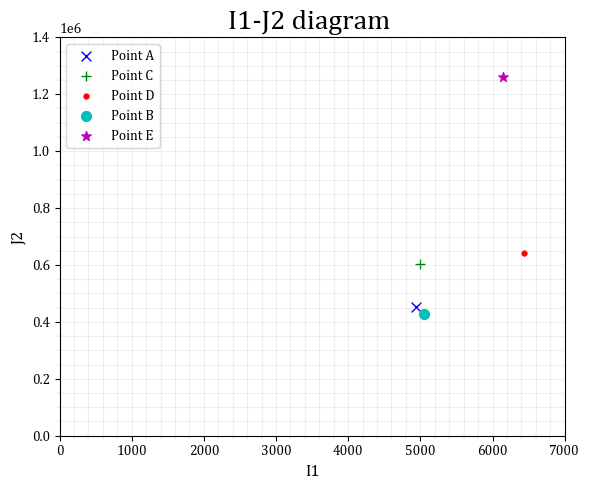

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
mrk = itertools.cycle(('x', '+', '.', 'o', '*')) 
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

def i1j2(s1, s2, s3, ax, title="") :
    """ 
    Plot I1-J2 diagram using Pandas DF
    """
    [s1,s2,s3] = sorted([s1,s2,s3], reverse=True)
   
    i1 = s1+s2+s3
    j2 = ( (s1-s3)**2 + (s1-s2)**2 + (s2-s3)**2 ) / 6

    ax.scatter(i1, j2, label=title, s=50, marker = next(mrk))
    ax.set_title("I1-J2 diagram ", fontsize=20)
    ax.set_xlabel("I1")
    ax.set_ylabel("J2")
    ax.set_xlim(0,7000)
    ax.set_ylim(0,1.4e6)
    ax.legend()
    return ax 

# Do the plotting
fig,ax = plt.subplots()
fig.set_size_inches(6,5)

i1j2(1461,2393,1089, ax, "Point A")
i1j2(1490,2514,989, ax, "Point C")
i1j2(1511,3048,1884, ax, "Point D")
i1j2(1569,2384,1091, ax, "Point B")
i1j2(1552,3334,1261, ax, "Point E")

# Format and save.
fig.tight_layout()
fig.savefig('HW1_I1J2.svg')

### EXERCISE 2

Mnemonic  Unit  Value     Description                
--------  ----  -----     -----------                
DEPTH     M     0	1	0	00  00	1	DEPTH                 
CALI      IN              2	Caliper                  
DRHO      G/CC            3	Bulk	Density	Correction  
DT        US/F            4	Sonic	Transit	Time       
GR        GAPI            5	Gamma	Ray                
NPHI      V/V             6	Neutron	Porosity         
PEF       B/E             7	Photo-Electric	Factor    
RHOB      G/CC            9	Bulk	Density             
RS        OHMM            10	Shallow	Resistivity     
RT        OHMM            8	Deep	Resistivity         
RXO       OHMM            11	Micro	Resistivity       
SP        MV              12	Spontaneous	Potential   


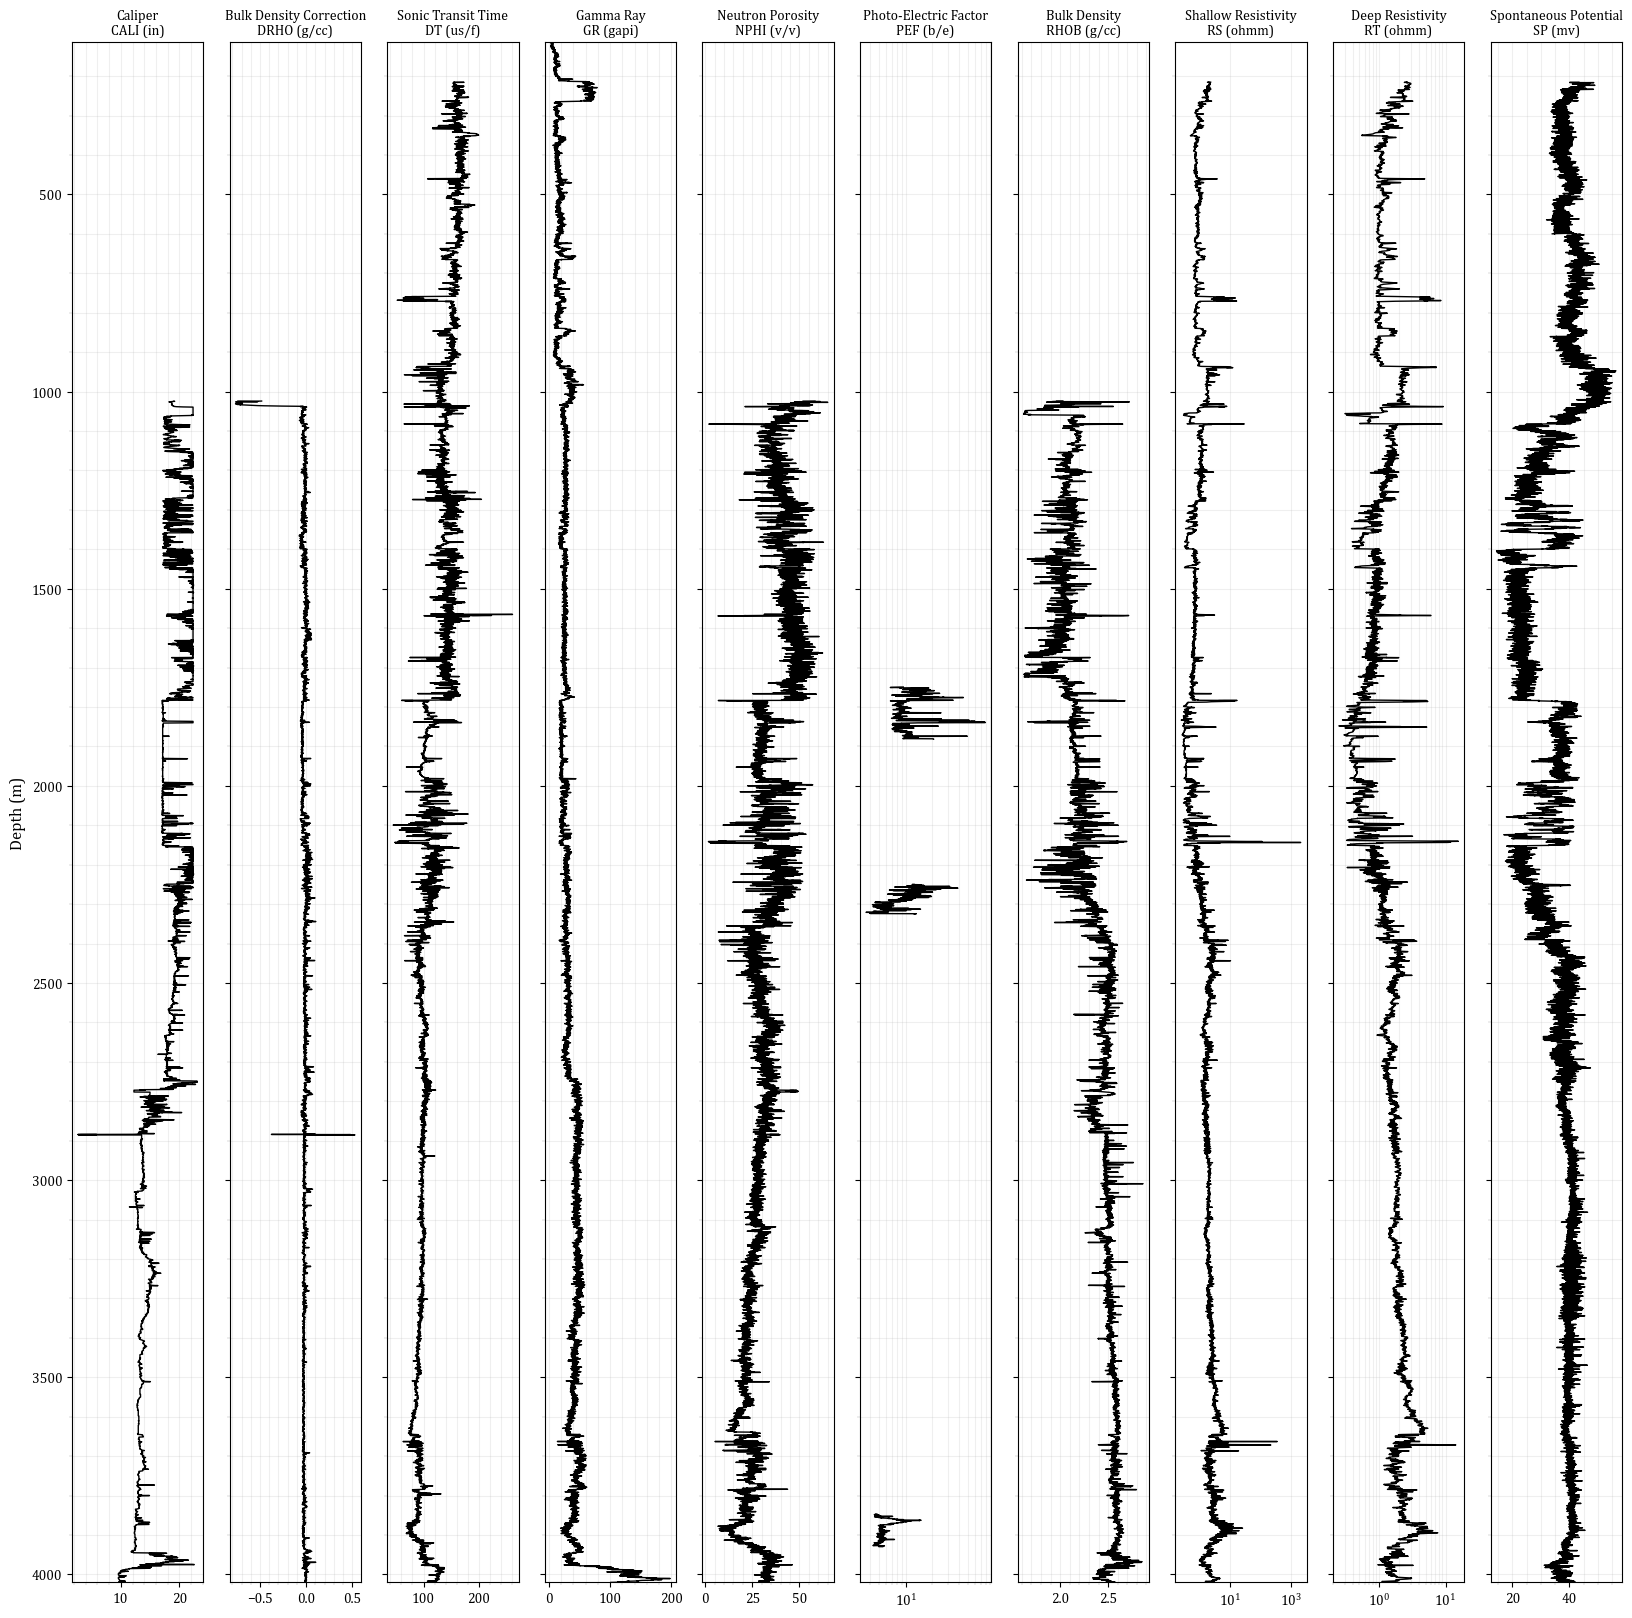

In [1]:
import matplotlib.pyplot as plt
import re
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

import lasio
las = lasio.read("1_14-1_Composite.las")
print(las.curves)

cfg = {
    "CALI"  : { 'scale' : 'linear' } ,             
    "DRHO"  : { 'scale' : 'linear' } ,       
    "DT"    : { 'scale' : 'linear' } ,                
    "GR"    : { 'scale' : 'linear' } ,                         
    "NPHI"  : { 'scale' : 'linear' } ,                 
    "PEF"   : { 'scale' : 'log' } ,         
    "RHOB"  : { 'scale' : 'linear' } ,               
    "RS"    : { 'scale' : 'log' } ,          
    "RT"    : { 'scale' : 'log' } ,               
    "RXO"   : { 'scale' : 'log' } ,                
    "SP"    : { 'scale' : 'linear' } ,  
}        

df = las.df().dropna(axis=1, how='all')
n_crv = df.shape[1]

fig, axs = plt.subplots(1, n_crv , sharey=True)
fig.set_size_inches(20,20)
axs[0].set_ylim( df.index.min(), df.index.max() )
axs[0].invert_yaxis()
axs[0].set_ylabel(f"Depth ({las.curves['DEPTH'].unit.lower()})")

i=0
for crv_name in df.columns:
    ax = axs[i]
    descr = las.curves[crv_name].descr.replace('\t'," ")
    descr = re.sub(r"^\d+\s*", "", descr)
    title = f"{descr}\n{crv_name} ({las.curves[crv_name].unit.lower()})"

    ax.plot( df[crv_name], df.index, color='k' )
    ax.set_title( title )
    ax.set_xscale( cfg[crv_name]['scale'] )
    i=i+1
    
fig.savefig("HW1-LAS_tracks.svg")


### Calculate Sv

Mnemonic  Unit  Value     Description                
--------  ----  -----     -----------                
DEPTH     M     0	1	0	00  00	1	DEPTH                 
CALI      IN              2	Caliper                  
DRHO      G/CC            3	Bulk	Density	Correction  
DT        US/F            4	Sonic	Transit	Time       
GR        GAPI            5	Gamma	Ray                
NPHI      V/V             6	Neutron	Porosity         
PEF       B/E             7	Photo-Electric	Factor    
RHOB      G/CC            9	Bulk	Density             
RS        OHMM            10	Shallow	Resistivity     
RT        OHMM            8	Deep	Resistivity         
RXO       OHMM            11	Micro	Resistivity       
SP        MV              12	Spontaneous	Potential   


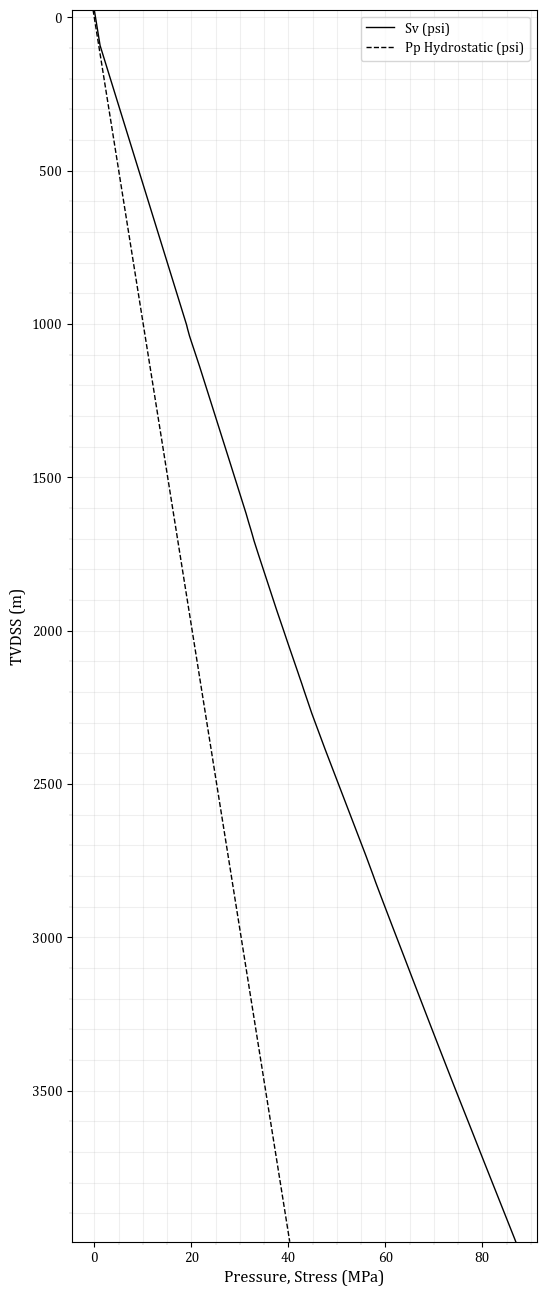

In [105]:
import lasio
las = lasio.read("1_14-1_Composite.las")
print(las.curves)

df = las.df().dropna(axis=1, how='all')
# Fill data as indicated in question
df["RHOB"] = df.RHOB.fillna(2) 
df["DRHO"] = df.DRHO.fillna(0)
df = df[["RHOB", "DRHO"]].dropna(axis=0).reset_index() # Delete rows with NA

# Add see water rows
df = pd.concat([
        pd.DataFrame( {"DEPTH" : np.linspace(0,104,100), "RHOB": 1.03, "DRHO" : 0 } ),
        df])

df["Bulk_mass_density"] = df["RHOB"] + df["DRHO"]
df["Prev_density"] = df.Bulk_mass_density.shift().fillna(1.03)

#                      g/cc                g[m/s2]      to Pa/m    to MPa
df["SvGrad"] = ( df.Bulk_mass_density/2 + df.Prev_density/2 ) *    9.8      *    1E3    *  1e-6

# Load the deviation model and interpolate into DF
dev_df = pd.read_csv("1_14-1_deviation_mod.dev", sep="\t")
df["TVDSS"] = np.interp(df.DEPTH, dev_df.DEPTH, dev_df.TVDSS )

df['DeltaDepth'] = df.DEPTH.diff().shift(-1)

df['dSv_psi'] = df.DeltaDepth * df.SvGrad  
df['Sv'] = df.dSv_psi.shift().cumsum().fillna(0)

# Water gradient and Hydro Pressure
#        g     sea water density (g/m3)     MPa/m
wgrad = 9.8   * 1030               * 1E-6
df["Pp_hyd"] = wgrad * df["TVDSS"]

fig, ax = plt.subplots(1, 1 , sharey=True)
fig.set_size_inches(6,16)
ax.set_ylim( df.TVDSS.min(), df.TVDSS.max() )
ax.invert_yaxis()
ax.set_ylabel(f"TVDSS (m)")
ax.set_xlabel("Pressure, Stress (MPa)")

ax.plot(df.Sv, df.TVDSS, color="k", ls='-', label="Sv (psi)")
ax.plot(df.Pp_hyd, df.TVDSS, color="k", ls='--', label="Pp Hydrostatic (psi)")

ax.legend()

fig.savefig("HW1_Sv_Pp.svg")



In [99]:
df

,DEPTH,RHOB,DRHO,Bulk_mass_density,Prev_density,SvGrad,TVDSS,DeltaDepth,dSv_psi,Sv,Pp_hyd
0,0.000000,1.0300,0.0000,1.0300,1.0300,0.010094,-25.000000,1.050505,0.010604,0.000000,0.000000
1,1.050505,1.0300,0.0000,1.0300,1.0300,0.010094,-23.949495,1.050505,0.010604,0.010604,0.010604
2,2.101010,1.0300,0.0000,1.0300,1.0300,0.010094,-22.898990,1.050505,0.010604,0.021208,0.021208
3,3.151515,1.0300,0.0000,1.0300,1.0300,0.010094,-21.848485,1.050505,0.010604,0.031811,0.031811
4,4.202020,1.0300,0.0000,1.0300,1.0300,0.010094,-20.797980,1.050505,0.010604,0.042415,0.042415
...,...,...,...,...,...,...,...,...,...,...,...
25625,4019.446400,2.5683,-0.0030,2.5653,2.5584,0.025106,3991.836716,0.152400,0.003826,86.883960,40.572292
25626,4019.598800,2.5733,-0.0006,2.5727,2.5653,0.025176,3991.988968,0.152400,0.003837,86.887787,40.573830
25627,4019.751200,2.5550,-0.0007,2.5543,2.5727,0.025122,3992.141220,0.152400,0.003829,86.891623,40.575369
25628,4019.903600,2.5267,-0.0060,2.5207,2.5543,0.024868,3992.293472,0.152400,0.003790,86.895452,40.576907
